In [2]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras import Sequential
from matplotlib import pyplot as plt

In [3]:
train_path = 'gender_classification_dataset/Training'
val_path = 'gender_classification_dataset/Validation'
train_datagen = ImageDataGenerator(rescale =  1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True )
train_generator = train_datagen.flow_from_directory(train_path,target_size=(32, 32),
                               batch_size= 32, class_mode='categorical')
val_datagen =  ImageDataGenerator(rescale =  1.0/255)
val_generator = train_datagen.flow_from_directory(val_path,target_size=(32, 32),
                               batch_size= 32, class_mode='categorical')


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [4]:
#here image is one batch hance it has 32 images as batch size was set to 32    
for image in val_generator:
    print('image type is ', type(image))
    print('image length is',len(image))
    print('image[0] has',len(image[0]),'images')
    print('image[1] is a encoded labels')
    print('image[0],image[1] both are numpy.ndarray')
    img = image[0]
    label = image[1]
    break

image type is  <class 'tuple'>
image length is 2
image[0] has 32 images
image[1] is a encoded labels
image[0],image[1] both are numpy.ndarray


In [16]:
len(train_generator)

1470

A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A sing

<ipython-input-6-6ab9941dd0bb>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()



 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]
A single image has shape  (32, 32, 3)

 first image has label  [1. 0.]


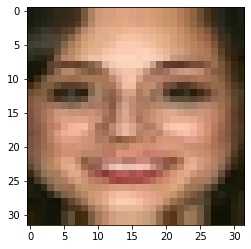

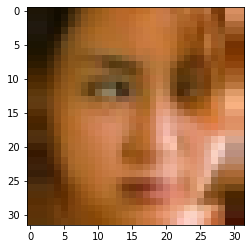

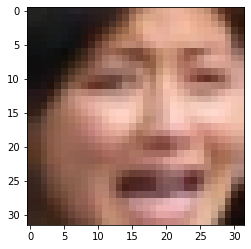

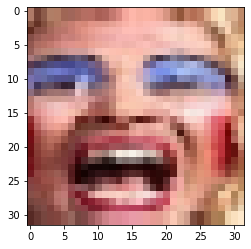

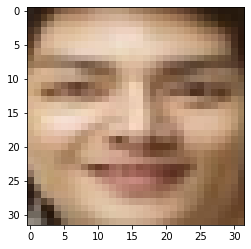

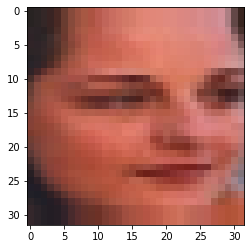

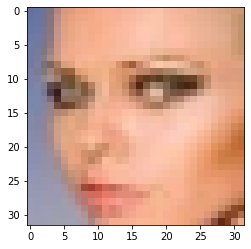

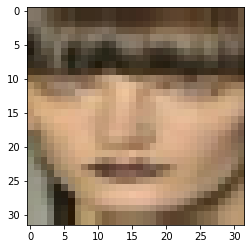

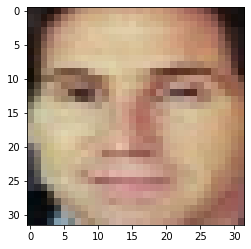

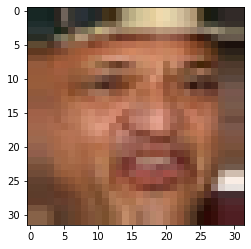

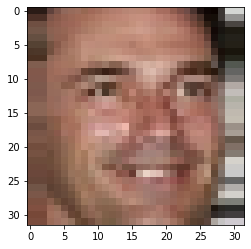

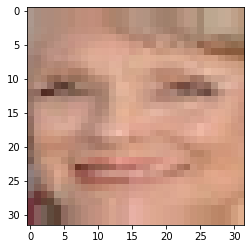

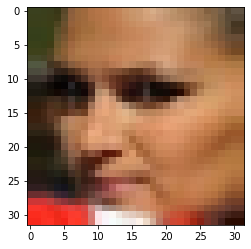

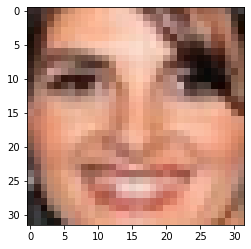

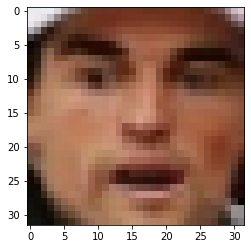

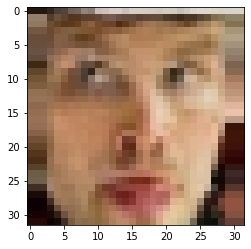

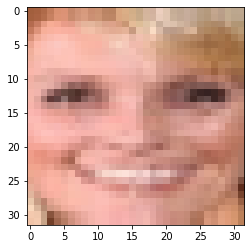

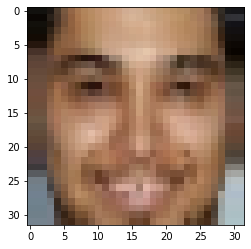

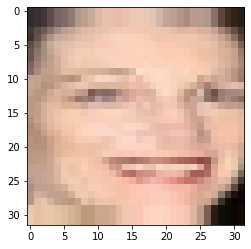

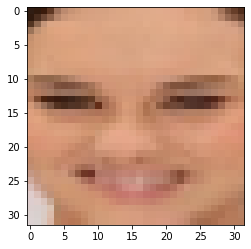

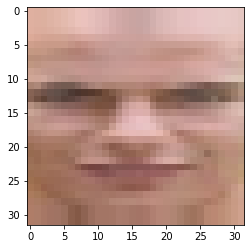

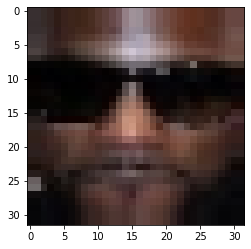

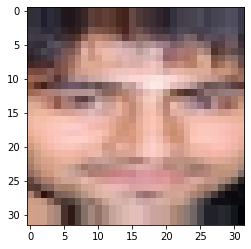

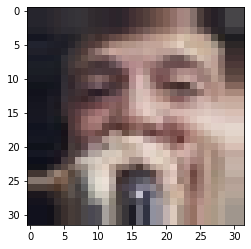

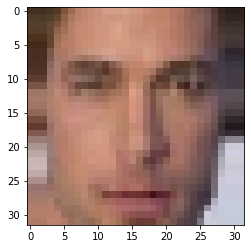

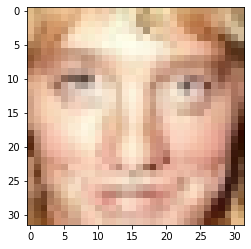

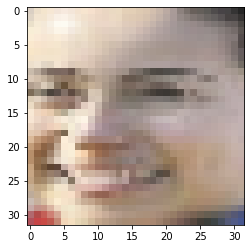

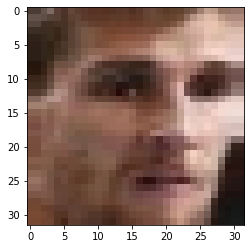

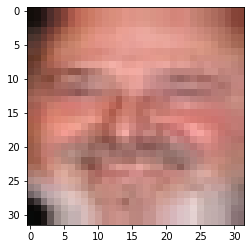

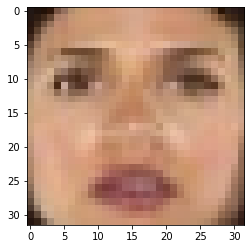

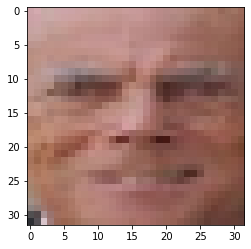

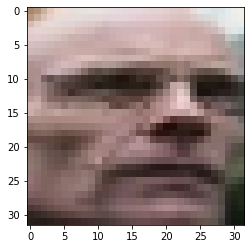

In [6]:
from PIL import Image
from matplotlib import cm
k = 0
for i in img:
    print('A single image has shape ',i.shape)
    plt.figure()
    plt.imshow(i)
    print('\n first image has label ',label[0])

In [7]:
dic = {1.0: 'Male', 0.0: 'Female'}

In [8]:
model = Sequential()
model.add(Convolution2D(100,(3,3),activation = 'relu',input_shape=(32, 32,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(100,(3,3),activation = 'relu',input_shape=(32, 32,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 100)       2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 7202      
Total params: 100,102
Trainable params: 100,102
Non-trainable params: 0
__________________________________________________

In [13]:
from keras.callbacks import Callback
acc = 0.93
class mycallback(Callback):
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') > acc):   
            print("\nReached %2.2f%% validation accuracy, so stop training " %(logs.get('acc')*100))
            self.model.stop_training = True

In [14]:
callback = mycallback()
model.fit(
train_generator,
        epochs=20,
        validation_data=val_generator,
        callbacks = [callback])

Epoch 1/20
1470/1470 [==============================] - 1742s 1s/step - loss: 0.4045 - acc: 0.8056 - val_loss: 0.2311 - val_acc: 0.9063
Epoch 2/20
1470/1470 [==============================] - 501s 341ms/step - loss: 0.2133 - acc: 0.9233 - val_loss: 0.1705 - val_acc: 0.9348
Epoch 3/20
1470/1470 [==============================] - 507s 345ms/step - loss: 0.1845 - acc: 0.9328 - val_loss: 0.1752 - val_acc: 0.9309

Reached 93.41% validation accuracy, so stop training 


In [15]:
model.save("Gender_class.h5")

In [2]:
from keras.models import load_model
import cv2
import numpy as np
from matplotlib import pyplot as plt
model = load_model('Gender_classification.h5')

In [5]:
for layer in model.layers:
    print(layer,'===>',layer.trainable)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001736141EF10> ===> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000017361502880> ===> True
<tensorflow.python.keras.layers.core.Flatten object at 0x000001736157AB80> ===> True
<tensorflow.python.keras.layers.core.Dense object at 0x000001736157EA00> ===> True


Found 8 images belonging to 2 classes.
['female\\131422.jpg.jpg', 'female\\131423.jpg.jpg', 'female\\131425.jpg.jpg', 'female\\131427.jpg.jpg', 'female\\3.jpg', 'male\\1.jpg', 'male\\2.jpg', 'male\\download.jpeg']
[0 0 0 0 0 0 0 0]


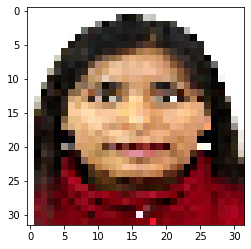

In [15]:
from keras.preprocessing.image import ImageDataGenerator
val_path = 'gender_classification_dataset/test'
test_datagen =  ImageDataGenerator(rescale =  1.0/255)
test_generator = test_datagen.flow_from_directory(
        val_path,
        target_size=(32, 32),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

# checkout the files names in test_generator 
filenames = list()
filenames = test_generator.filenames
nb_samples = len(filenames)
print(filenames)
# lets display an image from test_generator
image = test_generator[4][0].reshape(32,32,3)
plt.imshow(image)

# predicting on several images
predict = model.predict(test_generator)
print(np.argmax(predict, axis = -1))

'Female'

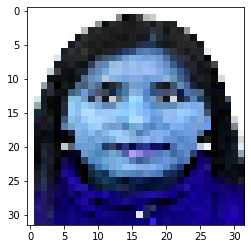

In [10]:
# prediction on a single image 
img = cv2.imread(r"C:\Users\zain\Documents\Python Scripts\gender_classification_dataset\test\female\3.jpg")
img = cv2.resize(img,(32,32))
plt.imshow(img)
img = img.reshape(1,32,32,3)
img = img/255
pred = model.predict(img)
dic[np.argmax(pred)]